# Classification Analysis
Course: ALY6015 Intermediate Analytics @NEU

Contributors: Chia-Yun Chiang, Yu-Wei Hsu, Yu-Chiao Shaw, Yichun Jin, Gahyoung Lee

# Introduction


# Dataset Description 

The discription of dataset are from ([source1](https://morioh.com/p/6b3fc6e3c71c),  [source2](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)). We would like to use these descriptions for interpretation purpose.

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1 = male; 2 = female)
- EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)



# Setup

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import io
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
import random
from numpy.random import randint
from astropy.table import Table, Column
from tqdm import tqdm
from dateutil.parser import parse
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import requests
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold


In [ ]:
# Set style
plt.style.use('seaborn-white')
plt.style.use('seaborn-pastel')
plt.rcParams["figure.figsize"] = (24,8)

In [ ]:
# Acquire data
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR0BYMan1HZdPd8YCM3NZ_D3WfNSNE6-yPNgBvhgLghlzFEiq3oNUpiX3-HBCJ_YF46J2nuwO5YJHZX/pub?gid=1968133426&single=true&output=csv"
df = pd.read_csv(path)

# EDA

# Defined EDA function for exploring purpose

In [ ]:
# Define function which generates countplot of all the dataset

def generate_countplot(df, target_column, column_list, color, palette):
  """
INPUT:
df - dataset
target_column - the column we want to compare (hue)
column_list - the column lists we are interested in generating count plot. suitable for column which has less categories. (maybe 1~10, depends on data)
color - defined color or None
palette - defined palette or None

OUTPUT:
generate a series of count plot with target column as legend (hue)
"""

  for i in column_list:
    plt.figure()
    sns.countplot(data=df, x=i, hue = target_column, color=color, palette=palette)

In [ ]:
# Define function which generate percentage table
def generate_perc_table(group1, group2, df):
  """
INPUT:
group1 - the column we are interested in 
group2 - our target column 
df - dataset

OUTPUT:
generate table which includes the percentage of our target column (group2) in different interested items (group1) 

** used inside the below function
"""
  count = df.groupby([group1, group2]).agg({group2:"count"})
  perc = count.groupby(level=0).apply(lambda x:round(100*x/x.sum(),2))
  print(perc)

In [ ]:
# Define function which generates percentage table for all the dataset
def generate_all_perc_table(df, target_column, column_list):
  """
INPUT:
df - dataset
target_column - the column we want to compare (hue)
column_list - the column lists we are interested in generating percentage table

OUTPUT:
a series of percentage table for our column list

"""
  for i in column_list:
    generate_perc_table(i, target_column, df)

In [ ]:
# Define function which generates distplot
# color ref: https://python-graph-gallery.com/100-calling-a-color-with-seaborn/
def generate_distplot(df, target_column, compare_column, subset0_name, subset1_name):
  plt.figure()
  subset0 = df[compare_column].loc[df[target_column] == 0]
  subset1 = df[compare_column].loc[df[target_column] == 1]
  sns.set_style('whitegrid')
  ax = sns.distplot(subset0, hist=True, kde_kws=dict(linewidth=4), color = "lightsalmon" )
  ax = sns.distplot(subset1, hist=True, kde_kws=dict(linewidth=4), color = "lightseagreen")
  plt.legend([subset0_name, subset1_name],fontsize=20)

# EDA on whole dataset

In [ ]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.drop(columns="ID", inplace = True)

## Check each column to decide on which visualizations we would like to use

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1 = male; 2 = female)
- EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others)
- AGE: Age in years

In [ ]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

- The EDUCATION column has a value of 0 - 6, which does not align with the dataset description. As a result, we will clean this column to value 1 - 4. 
- We will treat the values 0, 5, and 6 as 4s, meaning that they refer to "other" levels of education.



In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

- The MARRIAGE column has a value of 0 - 3, which does not align with the dataset description. As a result, we will clean this column to value 1 - 3 in the following cell by putting 0 in 3 as ‘others’.

In [ ]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
df.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
df.PAY_3.value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [ ]:
df.BILL_AMT1.value_counts()

0.0         2008
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
52515.0        1
7691.0         1
10183.0        1
144525.0       1
79900.0        1
Name: BILL_AMT1, Length: 22723, dtype: int64

In [ ]:
df.PAY_AMT4.value_counts()

0.0         6408
1000.0      1394
2000.0      1214
3000.0       887
5000.0       810
            ... 
13460.0        1
117086.0       1
7991.0         1
7469.0         1
3059.0         1
Name: PAY_AMT4, Length: 6937, dtype: int64

In [ ]:
# Percentage of payment > check if data is inbalance
df["default.payment.next.month"].value_counts()/df["default.payment.next.month"].value_counts().sum()

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

## Clean the data

In [ ]:
# Change education: 0, 5, 6 to 4(others)
ccd = df.copy()
ccd.loc[((ccd['EDUCATION']==5) | (ccd['EDUCATION']==6) | (ccd['EDUCATION']==0)), 'EDUCATION'] = 4

In [ ]:
ccd.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
# Change marriage: 0 to 3(others)
ccd['MARRIAGE'].value_counts(sort=False)

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [ ]:
ccd.loc[(ccd['MARRIAGE']==0), 'MARRIAGE'] = 3

In [ ]:
"""
def change_pay(column):
  ccd.loc[((ccd[column]==-2) | (ccd[column]==0)), column] = -1
  """

'\ndef change_pay(column):\n  ccd.loc[((ccd[column]==-2) | (ccd[column]==0)), column] = -1\n  '

In [ ]:
# Fix the values in pay_i 
pay_features= ['PAY_' + str(i) for i in (0,2,3,4,5,6)]
for x in pay_features:
  ccd.loc[ccd[x] <= 0, x] = 0

In [ ]:
ccd.PAY_0.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64

In [ ]:
# Rename the target feature
ccd.rename(columns={"default.payment.next.month": "DEFAULT"}, inplace=True)

In [ ]:
ccd.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

## Data Visualization

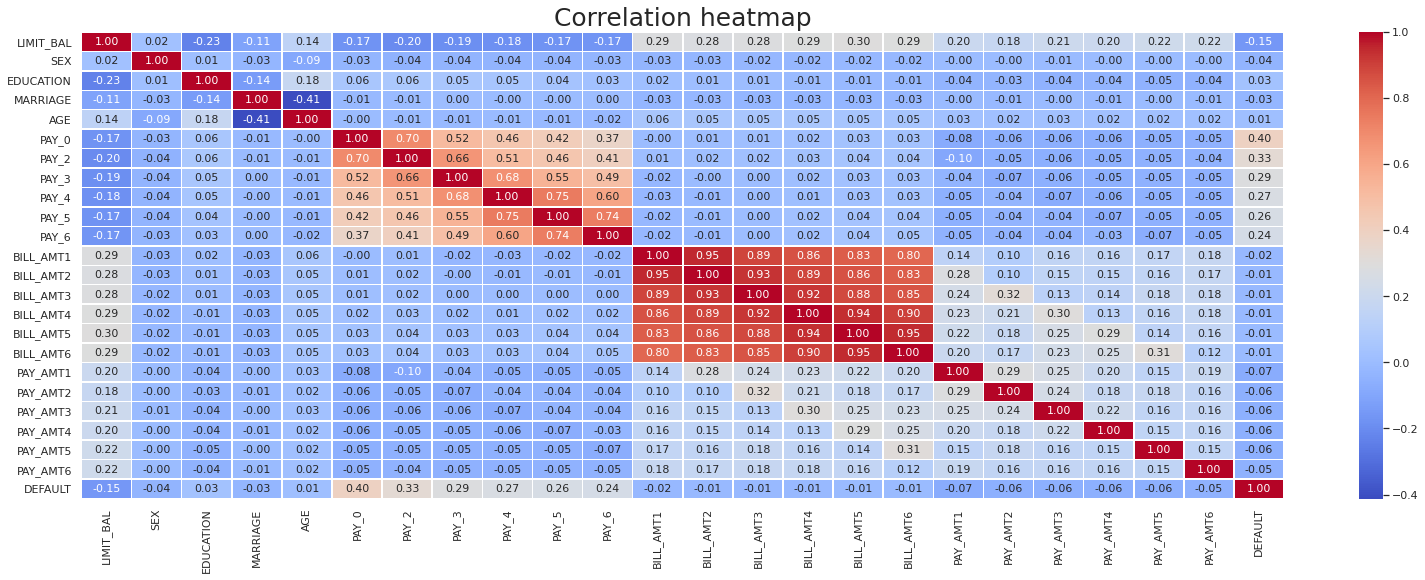

In [ ]:
# Check the correlation between features
corr = ccd.corr() 
f,ax = plt.subplots()
sns.heatmap(corr, annot = True, annot_kws={"size":11}, fmt= '.2f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Correlation heatmap', size=25);

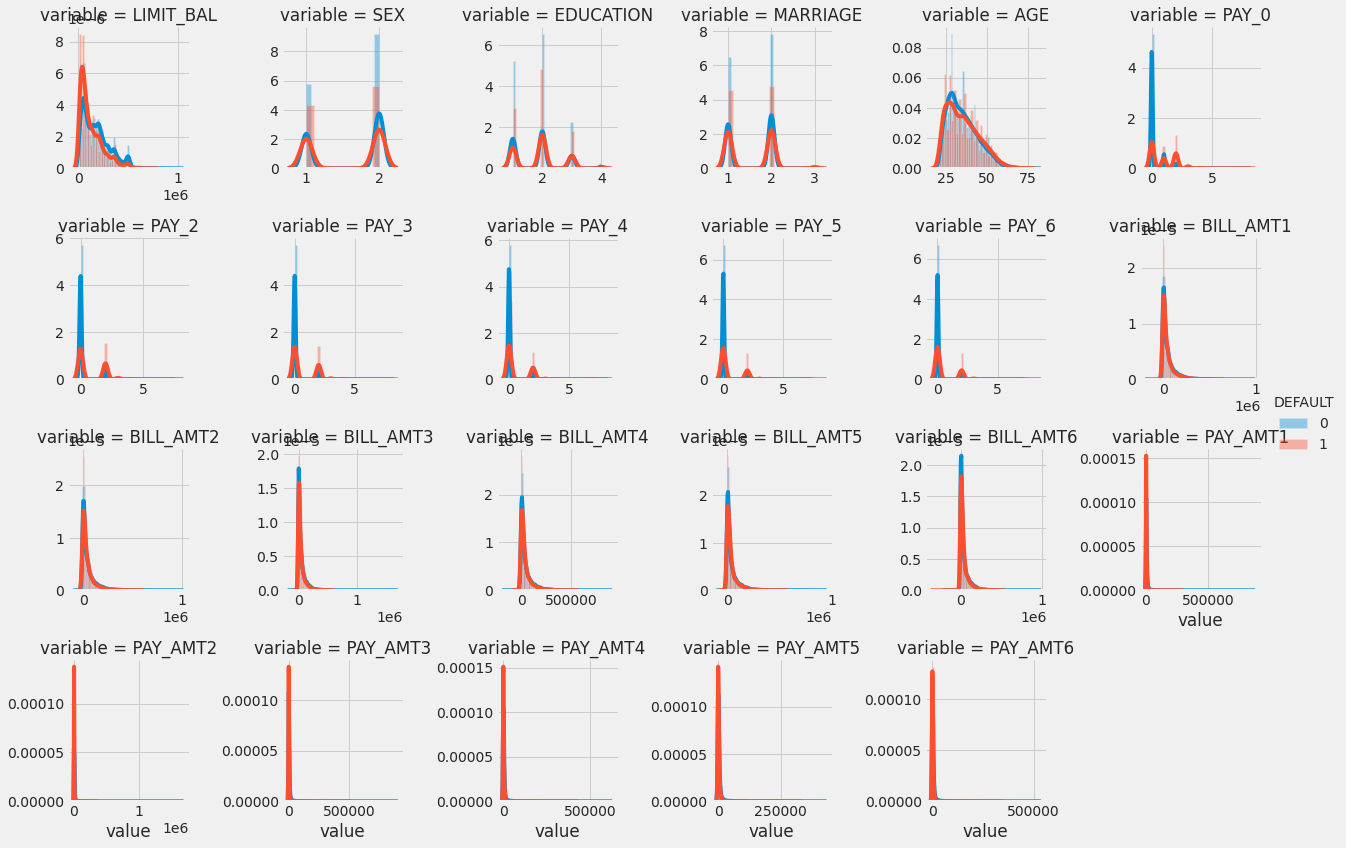

In [ ]:
# Distplot
plt.style.use('fivethirtyeight')
output = 'DEFAULT'

cols = [ f for f in ccd.columns if ccd.dtypes[ f ] != "object"]
cols.remove( output )

f = pd.melt( ccd, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=6, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [ ]:
# Pie Chart
# percentage of sex
total = len(ccd)
male = len(ccd[ccd['SEX']==1]) / total *100
female = len(ccd[ccd['SEX']==2]) / total *100

# Percentage of subgroup(sex)
maleY = len(ccd.loc[(ccd['SEX']==1) & (ccd['DEFAULT']==1)]) / total *100
maleN = len(ccd.loc[(ccd['SEX']==1) & (ccd['DEFAULT']==0)]) / total *100
femaleY = len(ccd.loc[(ccd['SEX']==2) & (ccd['DEFAULT']==1)]) / total *100
femaleN = len(ccd.loc[(ccd['SEX']==2) & (ccd['DEFAULT']==0)]) / total *100

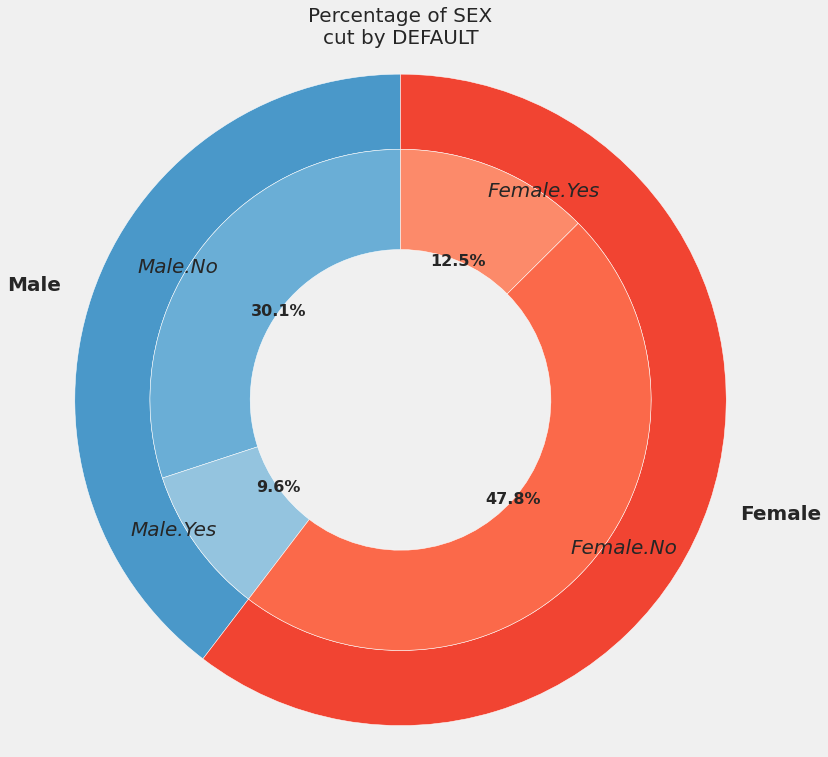

In [ ]:
# Lists of groups name and values 
group_names = ['Male','Female']
group_size = [male,female]
subgroup_names = ['Male.No', 'Male.Yes', 'Female.No', 'Female.Yes']
subgroup_size = [maleN,maleY,femaleN,femaleY]
 
# Create colors
a, b = [plt.cm.Blues, plt.cm.Reds]
 
# First Ring(outside)
fig, ax = plt.subplots(figsize = (10,12))
ax.axis('equal')
mypie,texts = ax.pie(group_size, radius=1.3, labels = group_names, 
                     colors = [a(0.6), b(0.6)], startangle=90)
plt.setp(mypie,width = 0.3,edgecolor = 'white')
plt.setp(texts,size = 20,weight = 'bold')

# Second Ring(Inside)
mypie2,texts2,autotexts2 = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.9, 
                                  colors=[a(0.5), a(0.4), b(0.5), b(0.4)],autopct='%1.1f%%', startangle=90)
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.setp(texts2,size = 20, style='italic')
plt.setp(autotexts2,size = 16,weight = 'bold')
plt.margins(0,0)

# Set up the title
plt.title('Percentage of SEX\ncut by DEFAULT',size = 20)

# Show it
plt.show()

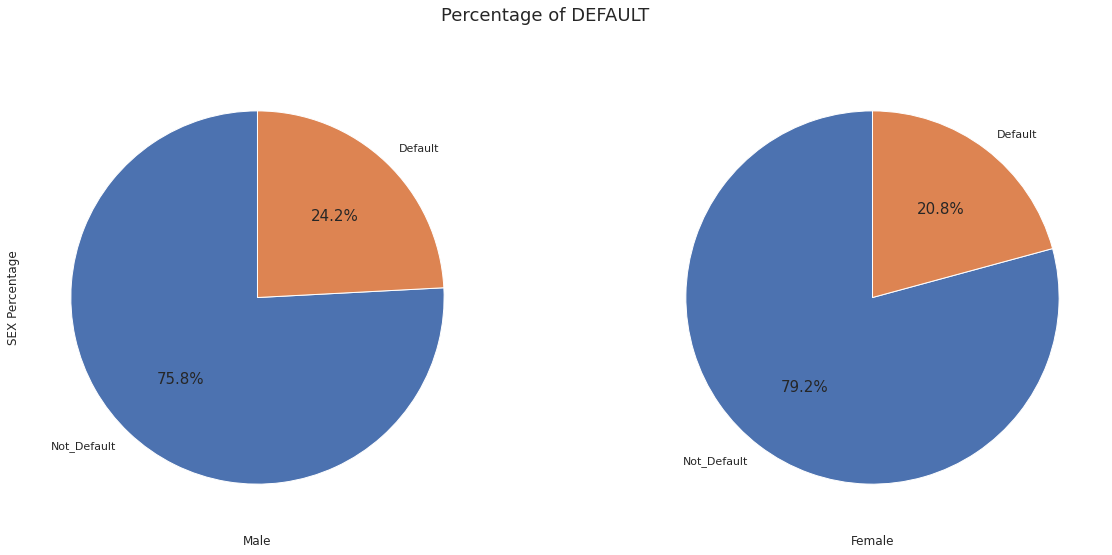

In [ ]:
# Draw the pie charts of the percentage of default
# Set the font size for whole graph
mpl.rcParams['font.size'] = 15

# Cross table of sex
table_sex = pd.crosstab(ccd.SEX,ccd.DEFAULT)
table_sexpct = table_sex.astype('float').div(table_sex.sum(axis=1),axis=0)*100.00

label = ['Not_Default','Default']

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (18,8))
ax1.pie(table_sexpct.loc[1], labels = label, autopct='%1.1f%%', startangle=90)
ax2.pie(table_sexpct.loc[2], labels = label,autopct='%1.1f%%', startangle=90)
ax1.set_ylabel('SEX Percentage')
ax1.set_xlabel('Male')
ax2.set_xlabel('Female')
fig.suptitle('Percentage of DEFAULT')

plt.show()

In [ ]:
# Percentage of education
grad = len(ccd[ccd['EDUCATION']==1]) / total *100 
uni = len(ccd[ccd['EDUCATION']==2]) / total *100 
high = len(ccd[ccd['EDUCATION']==3]) / total *100 
other = len(ccd[ccd['EDUCATION']==4]) / total *100 

# Percentage of subgroup(education)
gradY = len(ccd.loc[(ccd['EDUCATION']==1) & (ccd['DEFAULT']==1)]) / total *100
gradN = len(ccd.loc[(ccd['EDUCATION']==1) & (ccd['DEFAULT']==0)]) / total *100
uniY = len(ccd.loc[(ccd['EDUCATION']==2) & (ccd['DEFAULT']==1)]) / total *100
uniN = len(ccd.loc[(ccd['EDUCATION']==2) & (ccd['DEFAULT']==0)]) / total *100
highY = len(ccd.loc[(ccd['EDUCATION']==3) & (ccd['DEFAULT']==1)]) / total *100
highN = len(ccd.loc[(ccd['EDUCATION']==3) & (ccd['DEFAULT']==0)]) / total *100
otherY = len(ccd.loc[(ccd['EDUCATION']==4) & (ccd['DEFAULT']==1)]) / total *100
otherN = len(ccd.loc[(ccd['EDUCATION']==4) & (ccd['DEFAULT']==0)]) / total *100

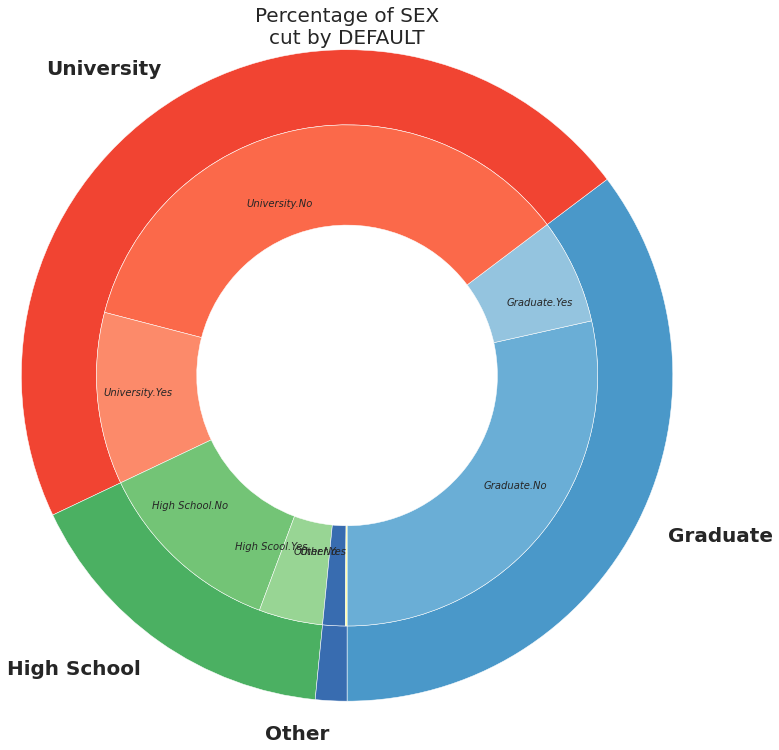

In [ ]:
# Lists of groups name and values 
group_names = ['Graduate','University','High School','Other']
group_size = [grad,uni,high,other]
subgroup_names = ['Graduate.No', 'Graduate.Yes', 'University.No', 'University.Yes',
                  'High School.No', 'High Scool.Yes', 'Other.No', 'Other.Yes']
subgroup_size = [gradN,gradY,uniN,uniY,highN,highY,otherN,otherY]
 
# Create colors
a, b, c, d = [plt.cm.Blues, plt.cm.Reds,plt.cm.Greens,plt.cm.Accent]
 
# First Ring(outside)
fig, ax = plt.subplots(figsize = (10,12))
ax.axis('equal')
mypie,texts = ax.pie(group_size, radius=1.3, labels = group_names, 
                     colors = [a(0.6), b(0.6),c(0.6), d(0.6)], startangle=270)
plt.setp(mypie,width = 0.3,edgecolor = 'white')
plt.setp(texts,size = 20,weight = 'bold')

# Second Ring(Inside)
mypie2,texts2 = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, startangle=270,labeldistance=0.7,
                      colors=[a(0.5), a(0.4), b(0.5), b(0.4),c(0.5), c(0.4), d(0.5), d(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.setp(texts2,size = 10, style='italic')
#plt.setp(autotexts2,size = 16,weight = 'bold')
plt.margins(0,0)

# Set up the title
plt.title('Percentage of SEX\ncut by DEFAULT',size = 20)

# show it
plt.show()

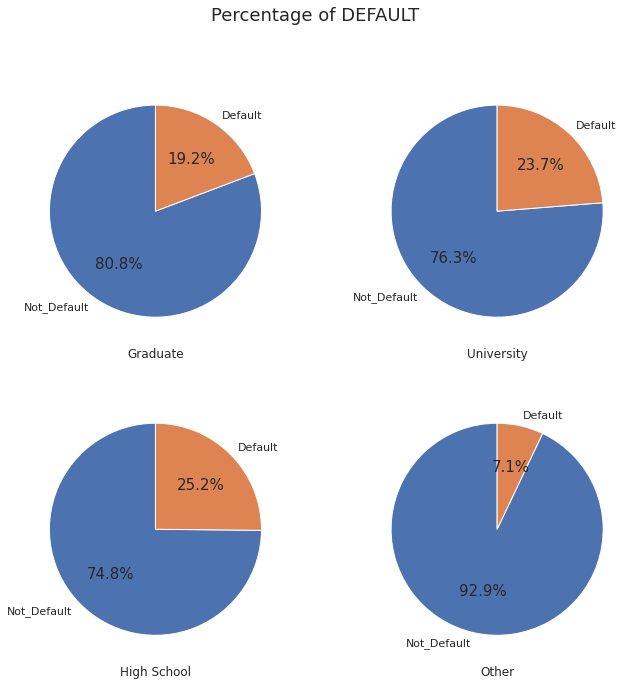

In [ ]:
# Draw the pie charts of the percentage of default
# Set the font size for whole graph
mpl.rcParams['font.size'] = 15

label = ['Not_Default','Default']

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (10,10))
ax1.pie([gradN,gradY], labels = label, autopct='%1.1f%%', startangle=90)
ax2.pie([uniN,uniY], labels = label,autopct='%1.1f%%', startangle=90)
ax3.pie([highN,highY], labels = label, autopct='%1.1f%%', startangle=90)
ax4.pie([otherN,otherY], labels = label,autopct='%1.1f%%', startangle=90)
ax1.set_xlabel('Graduate')
ax2.set_xlabel('University')
ax3.set_xlabel('High School')
ax4.set_xlabel('Other')
fig.suptitle('Percentage of DEFAULT')

plt.show()

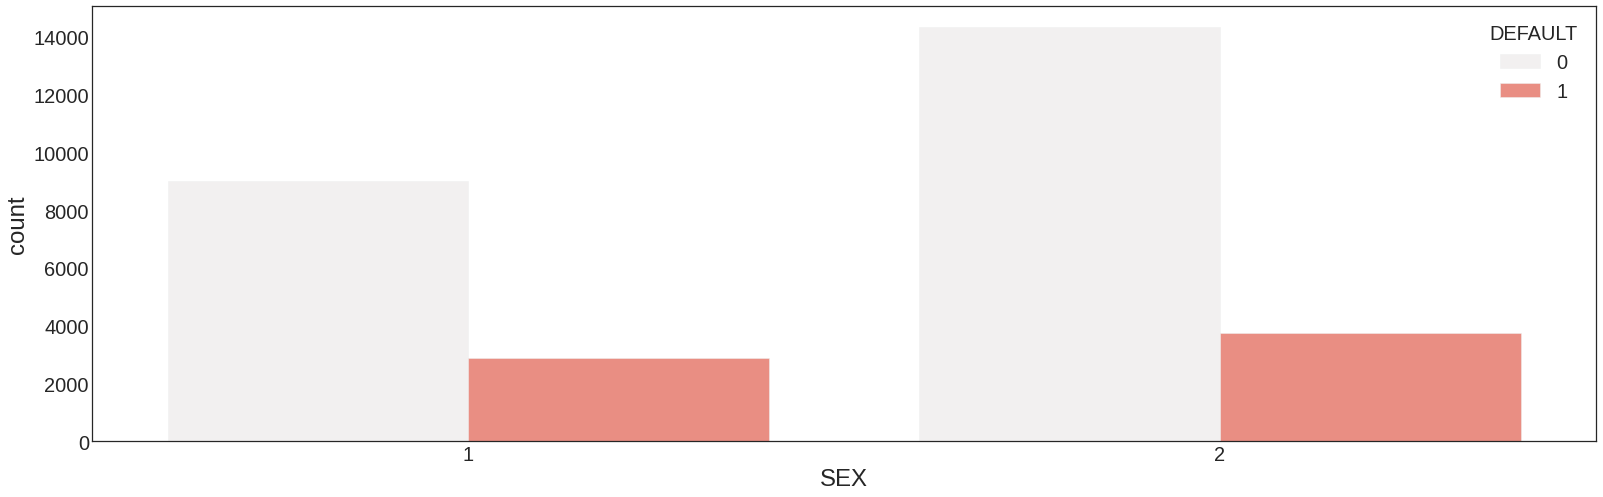

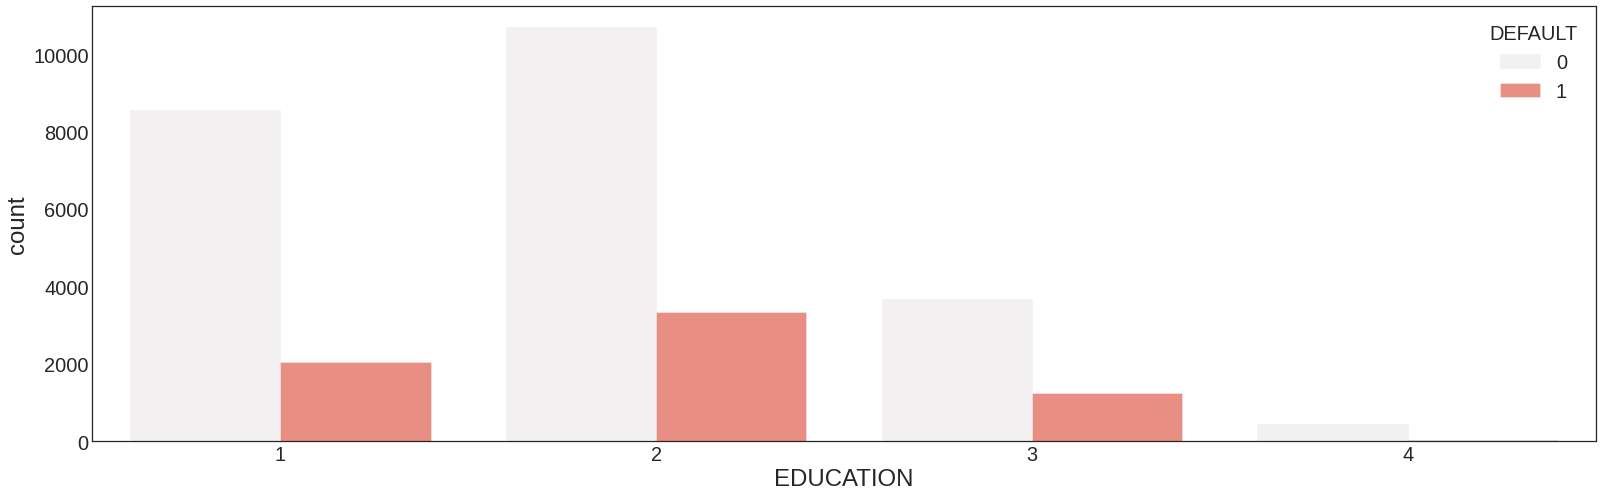

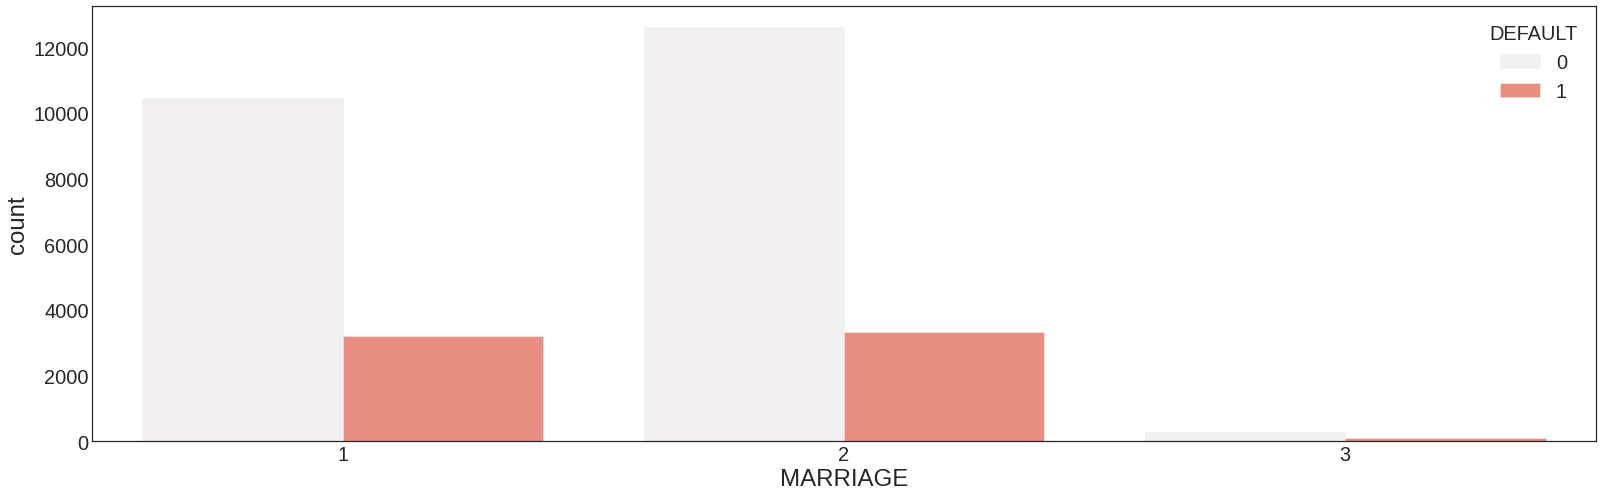

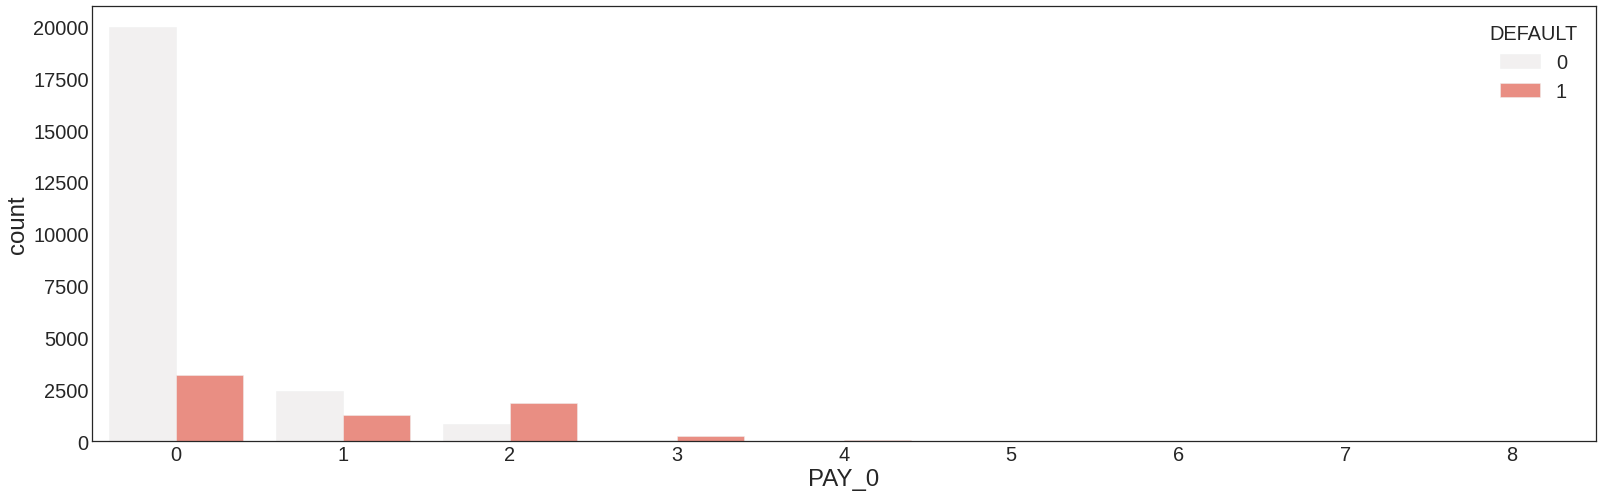

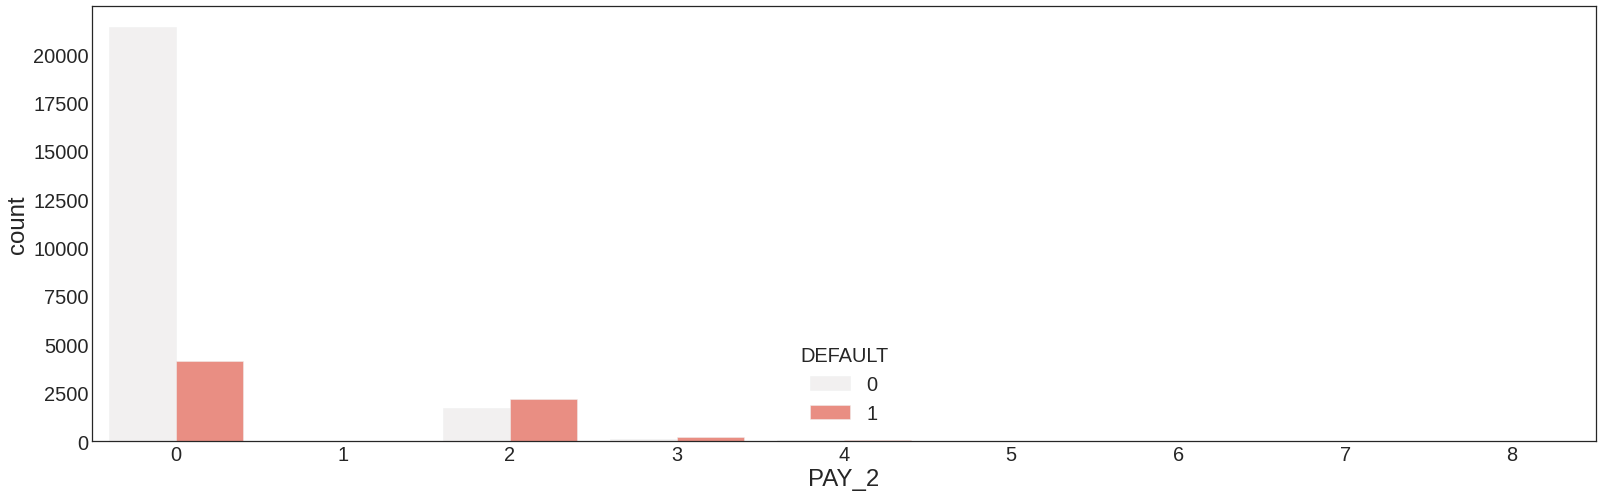

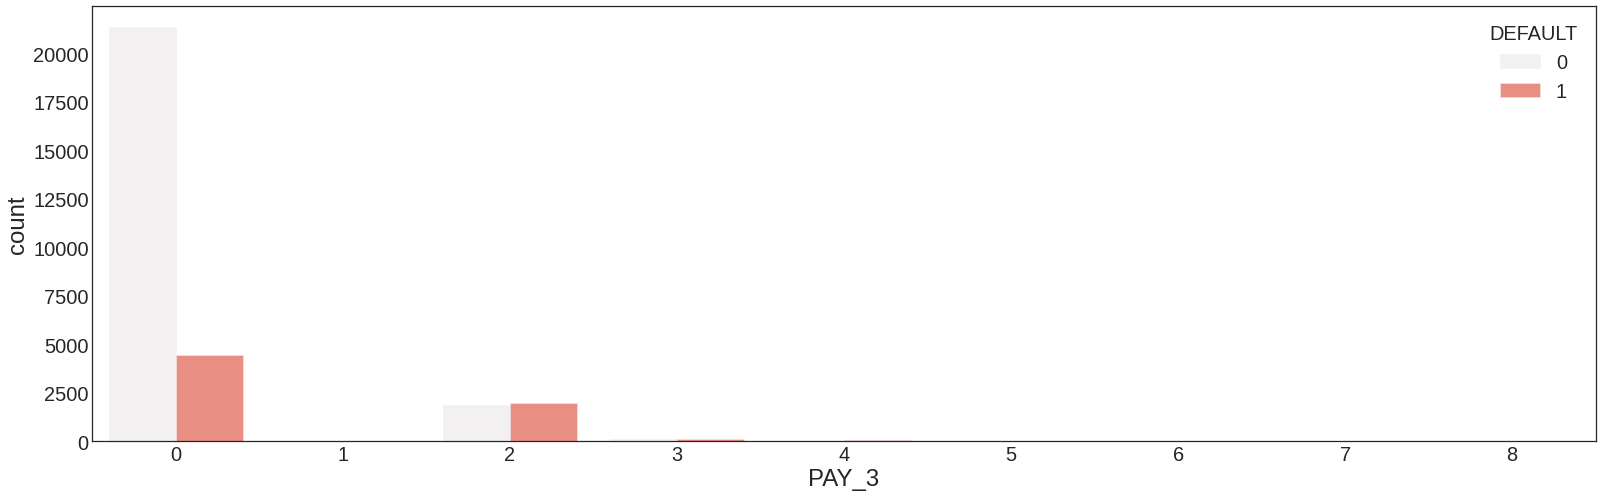

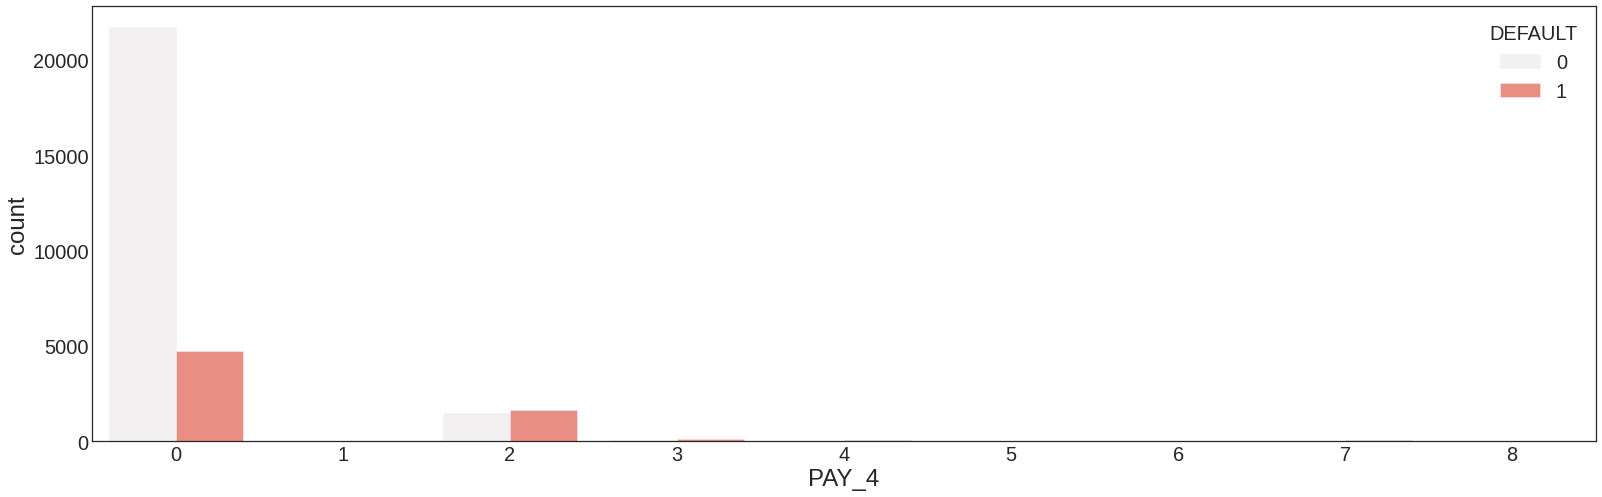

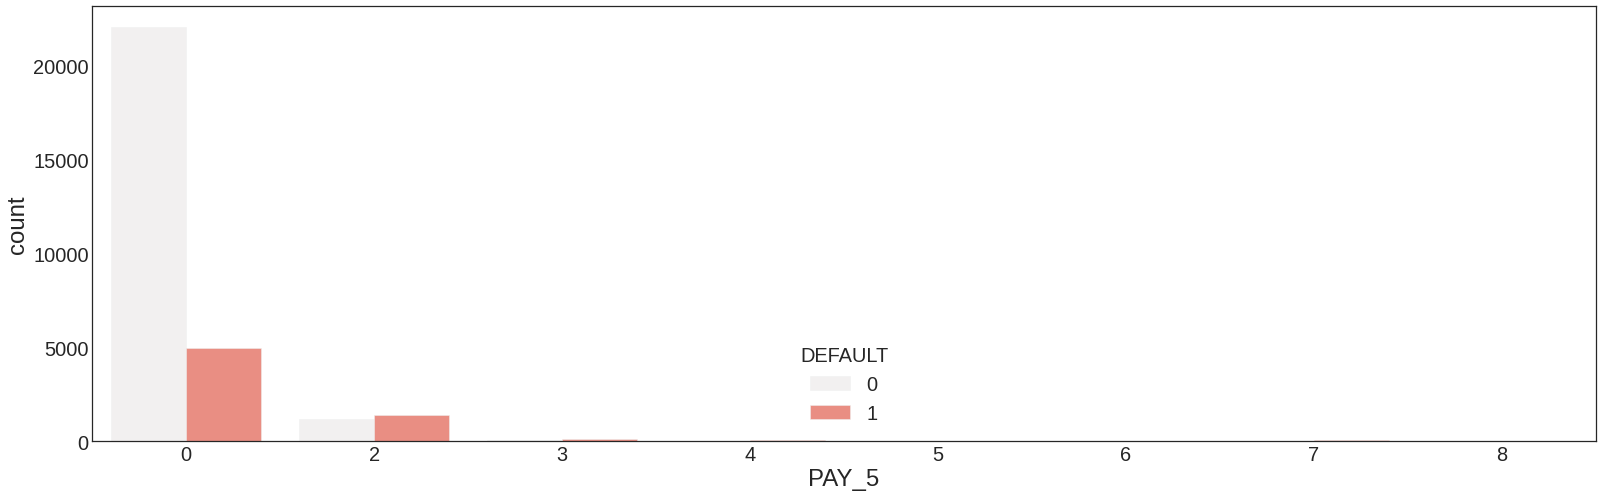

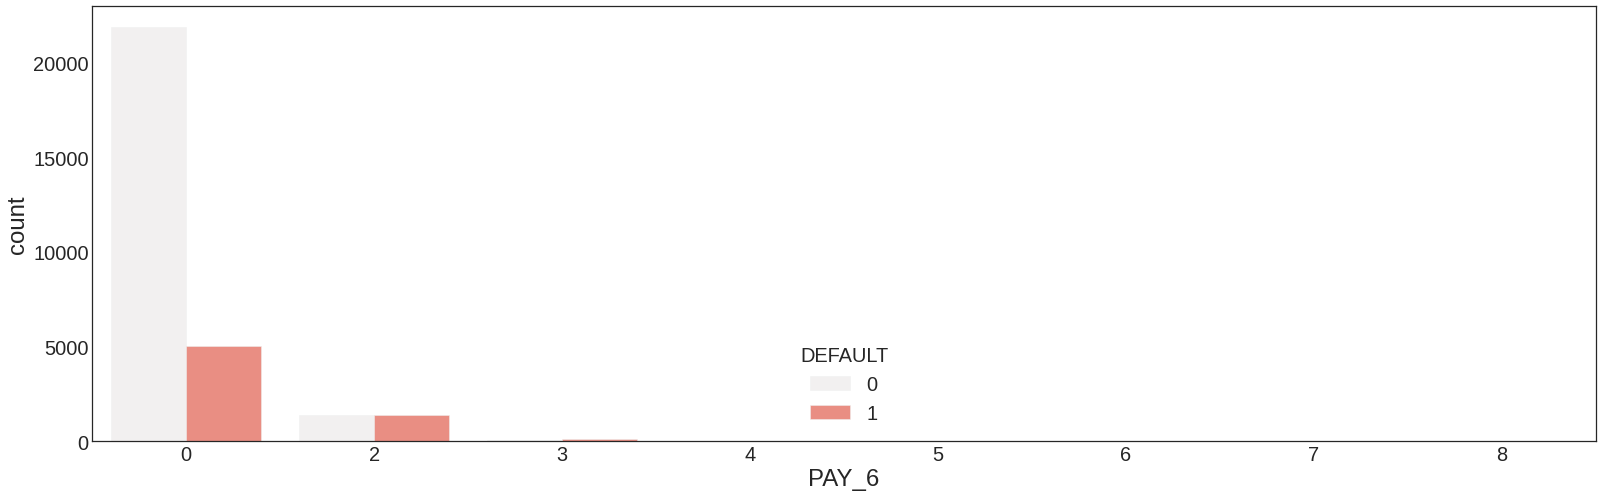

In [ ]:
# Count plot
column_list_count = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"] # Seems like these columns are suitable for using count plot
generate_countplot(ccd, "DEFAULT", column_list_count, color = "salmon", palette=None)

In [ ]:
# The percentage table which is used for interpretation with the count plot above
generate_all_perc_table(ccd, "DEFAULT", column_list_count)

             DEFAULT
SEX DEFAULT         
1   0          75.83
    1          24.17
2   0          79.22
    1          20.78
                   DEFAULT
EDUCATION DEFAULT         
1         0          80.77
          1          19.23
2         0          76.27
          1          23.73
3         0          74.84
          1          25.16
4         0          92.95
          1           7.05
                  DEFAULT
MARRIAGE DEFAULT         
1        0          76.53
         1          23.47
2        0          79.07
         1          20.93
3        0          76.39
         1          23.61
               DEFAULT
PAY_0 DEFAULT         
0     0          86.17
      1          13.83
1     0          66.05
      1          33.95
2     0          30.86
      1          69.14
3     0          24.22
      1          75.78
4     0          31.58
      1          68.42
5     0          50.00
      1          50.00
6     0          45.45
      1          54.55
7     0          22.22
     

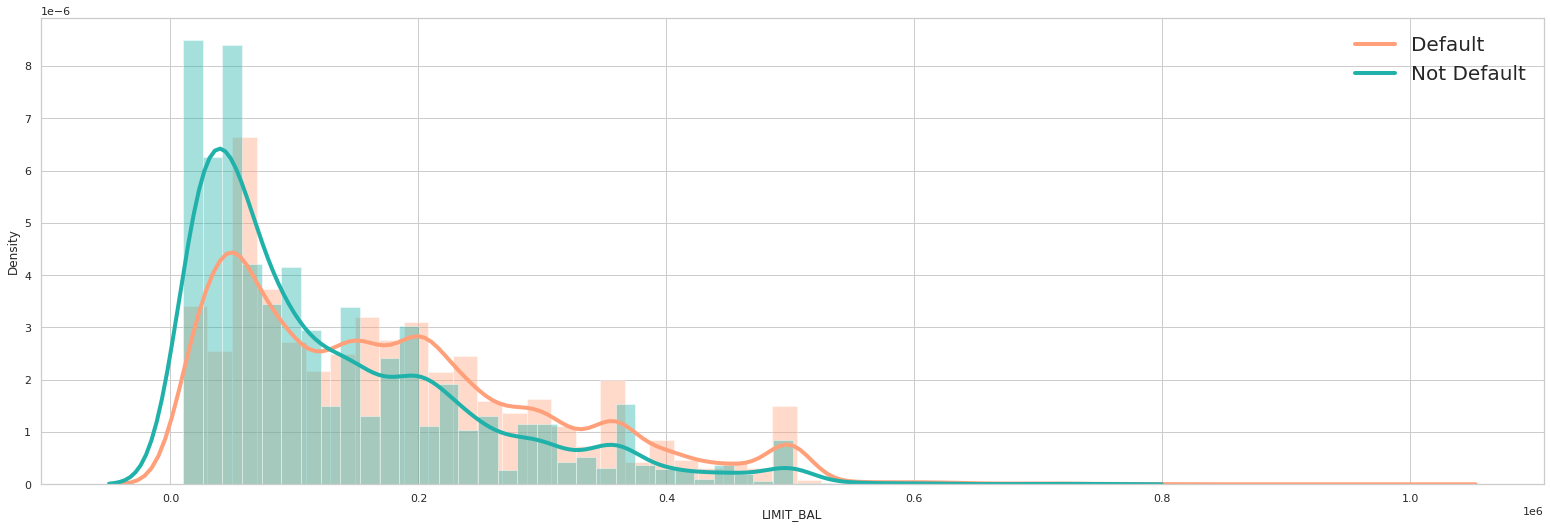

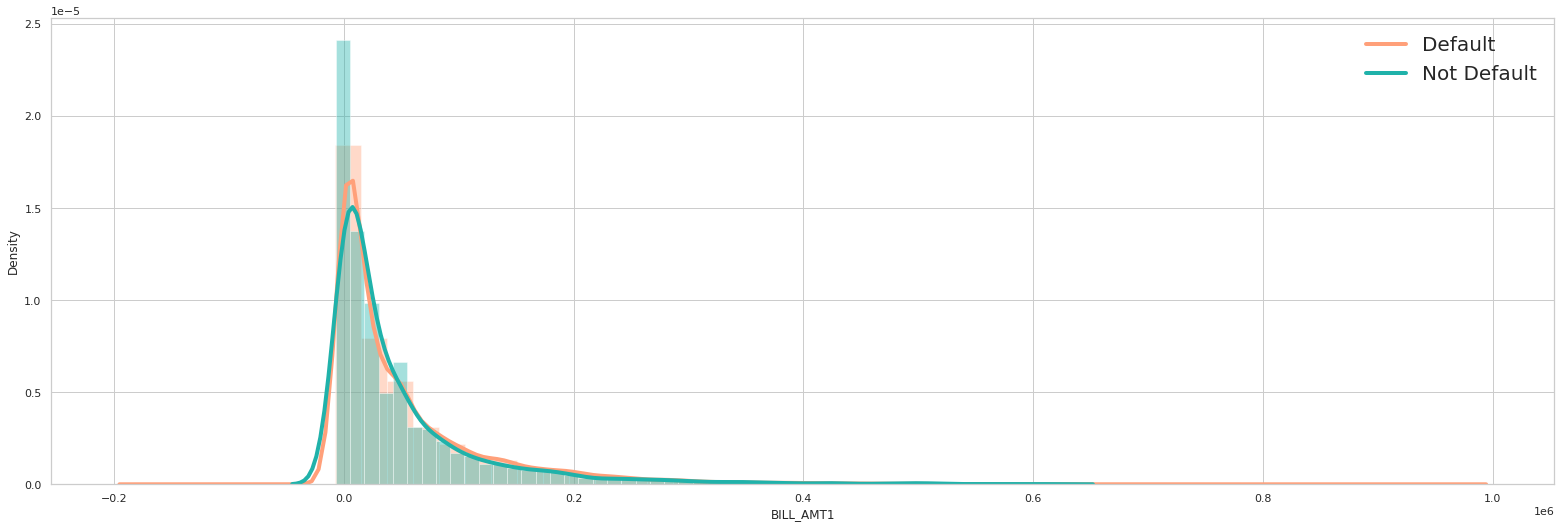

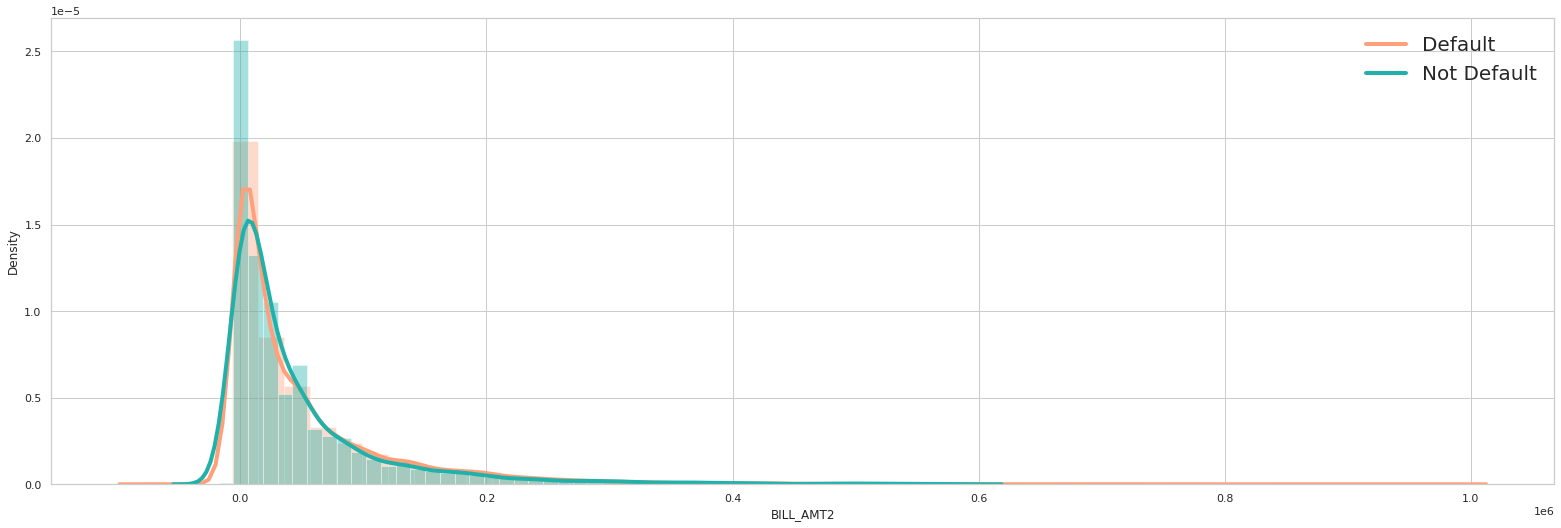

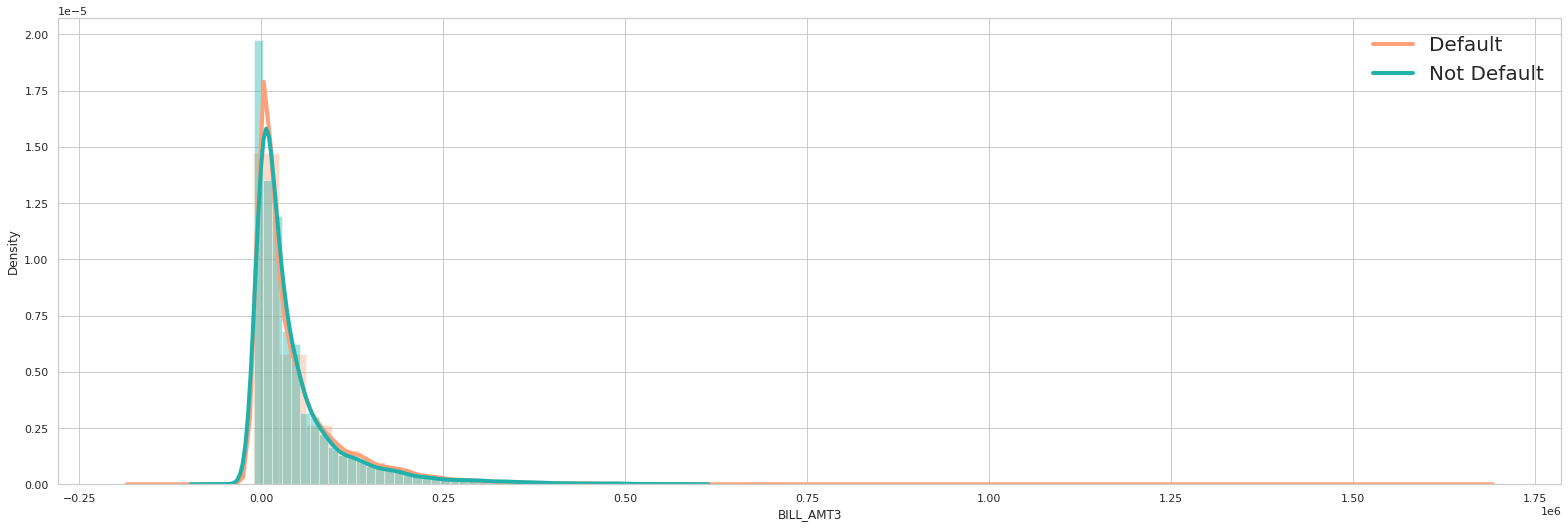

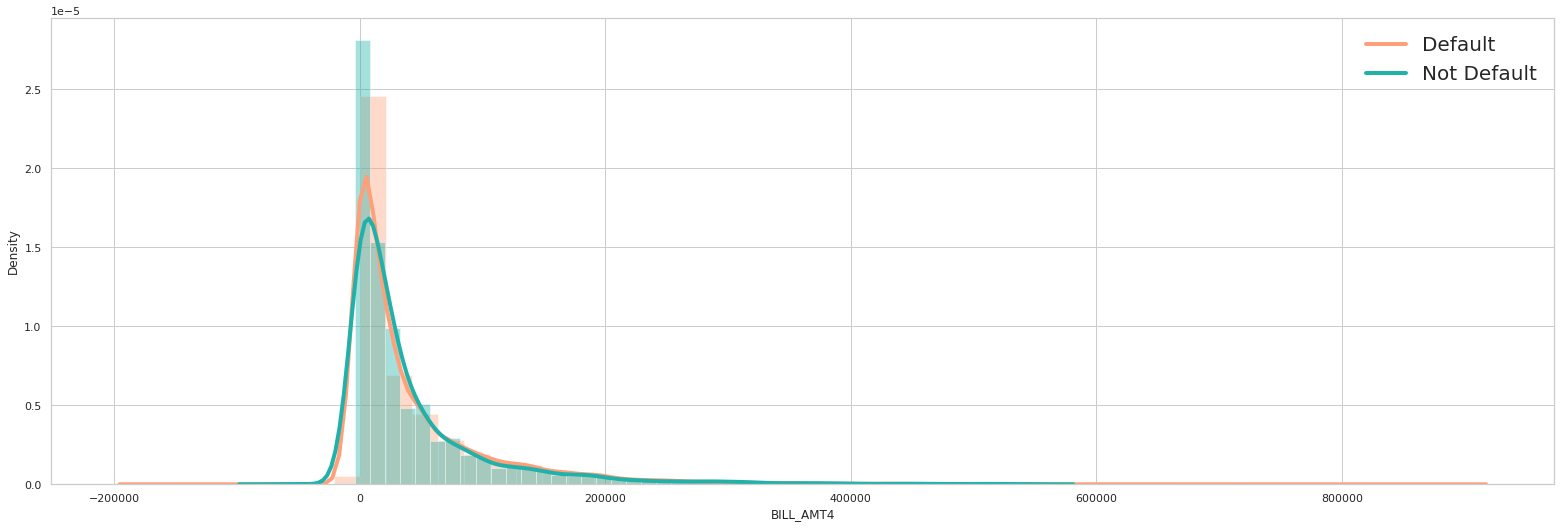

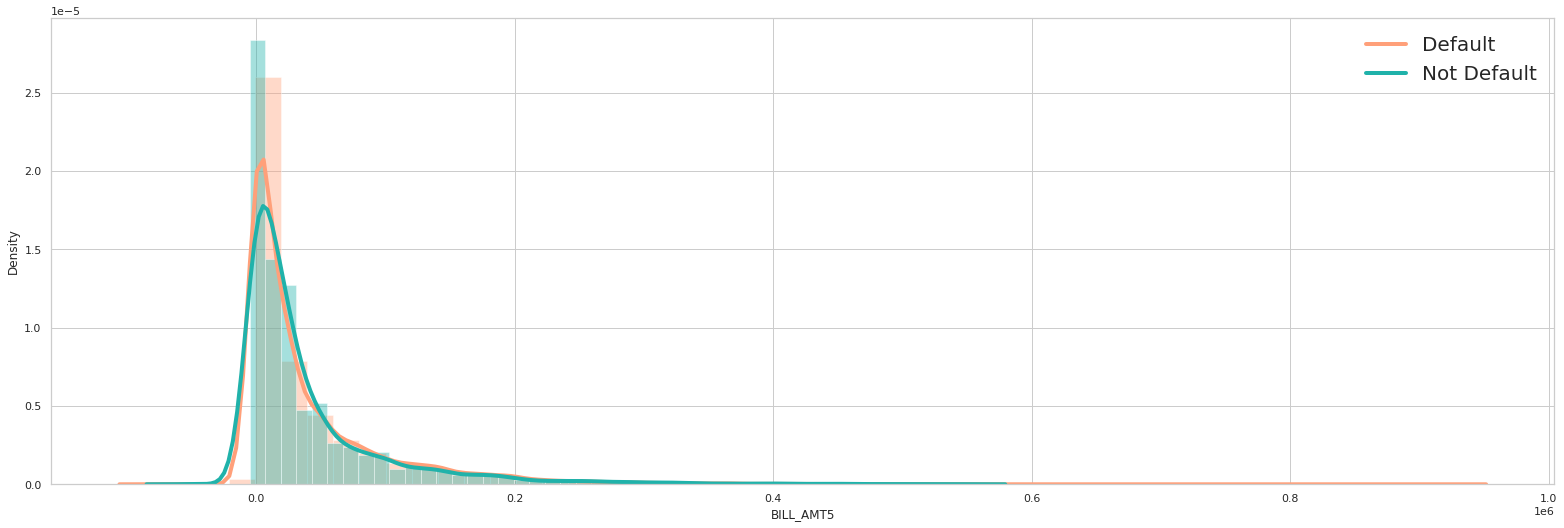

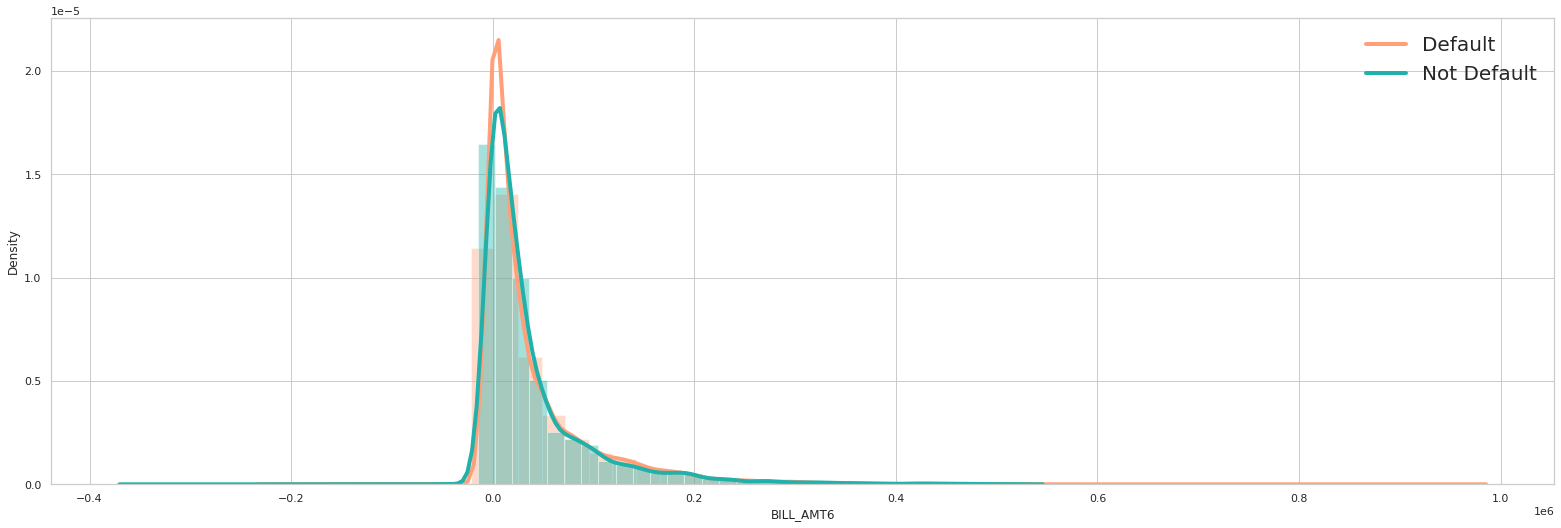

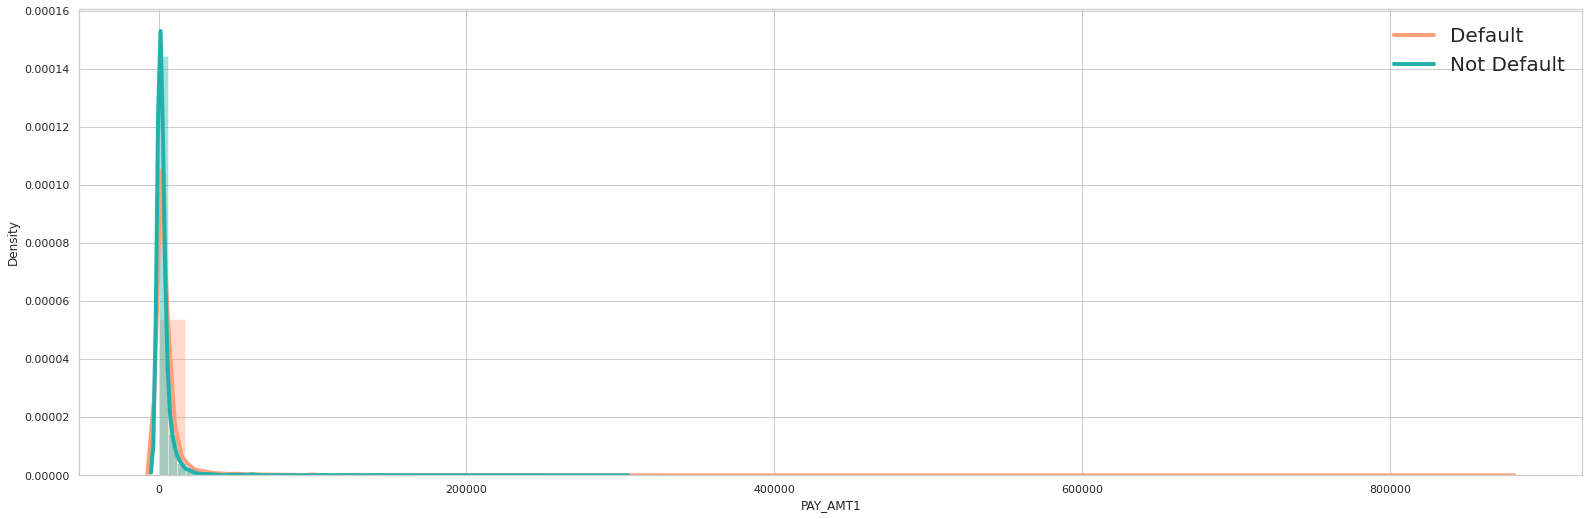

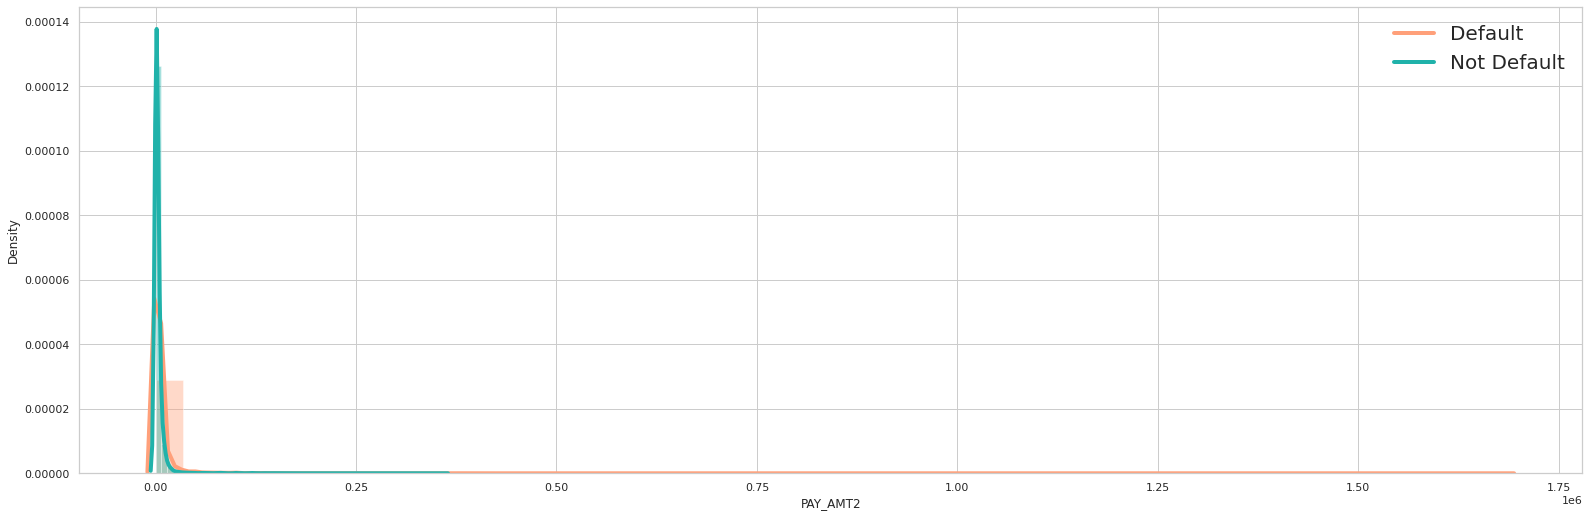

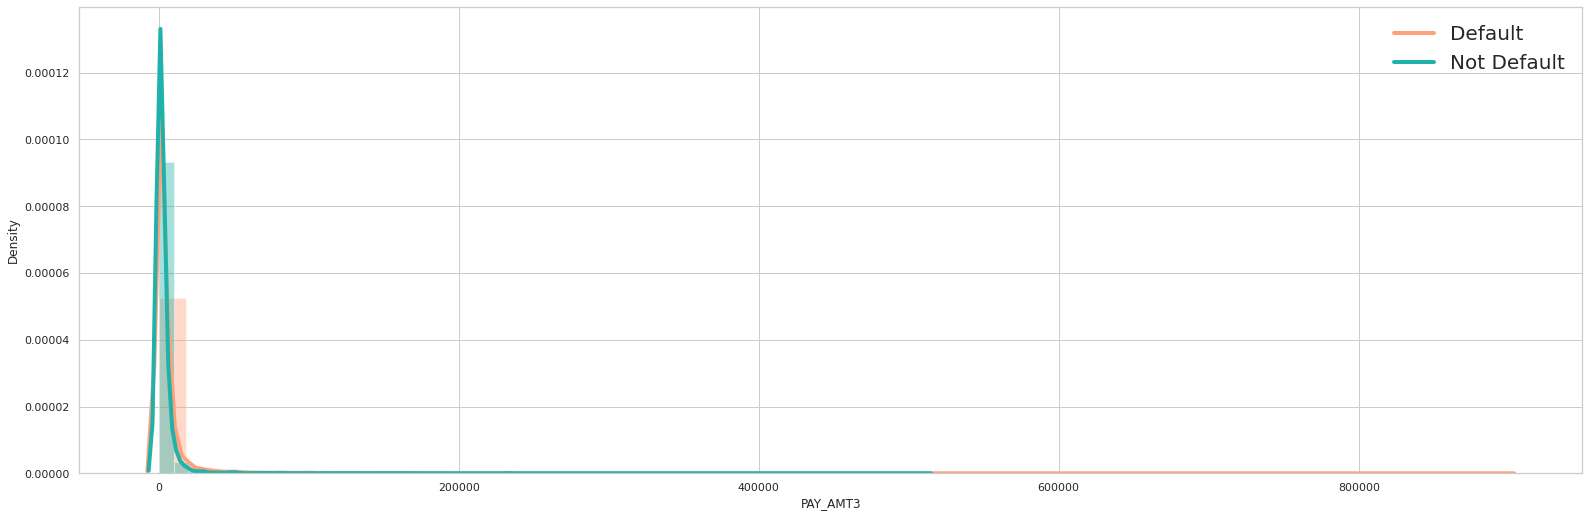

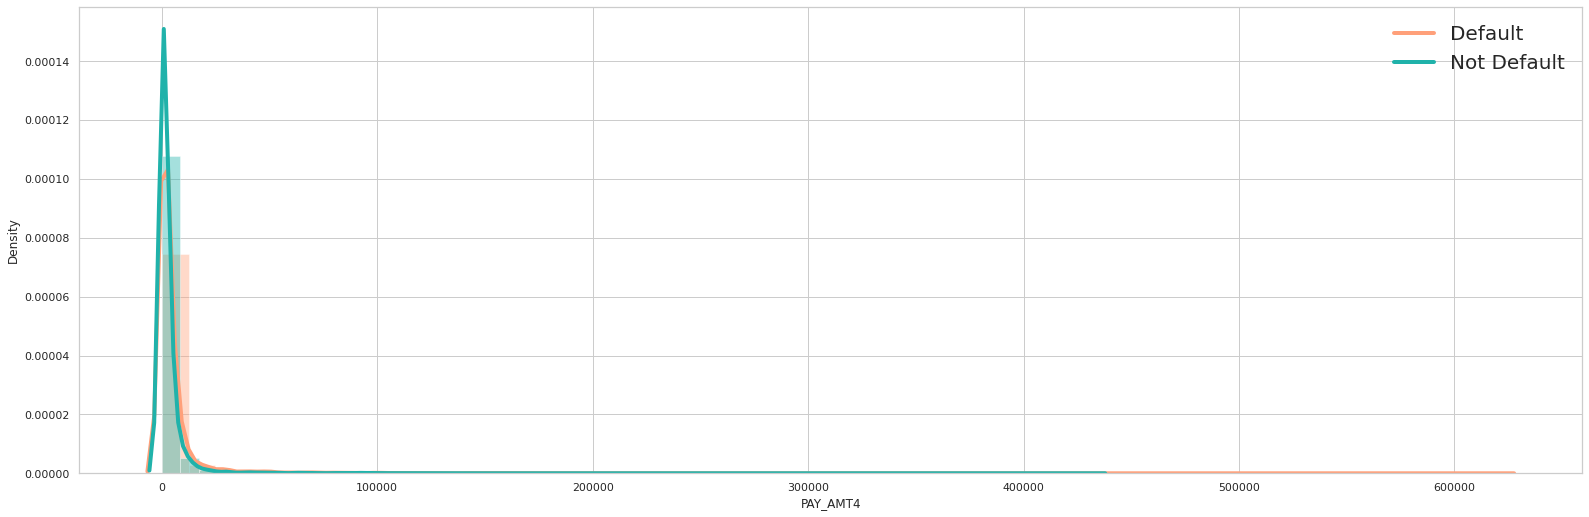

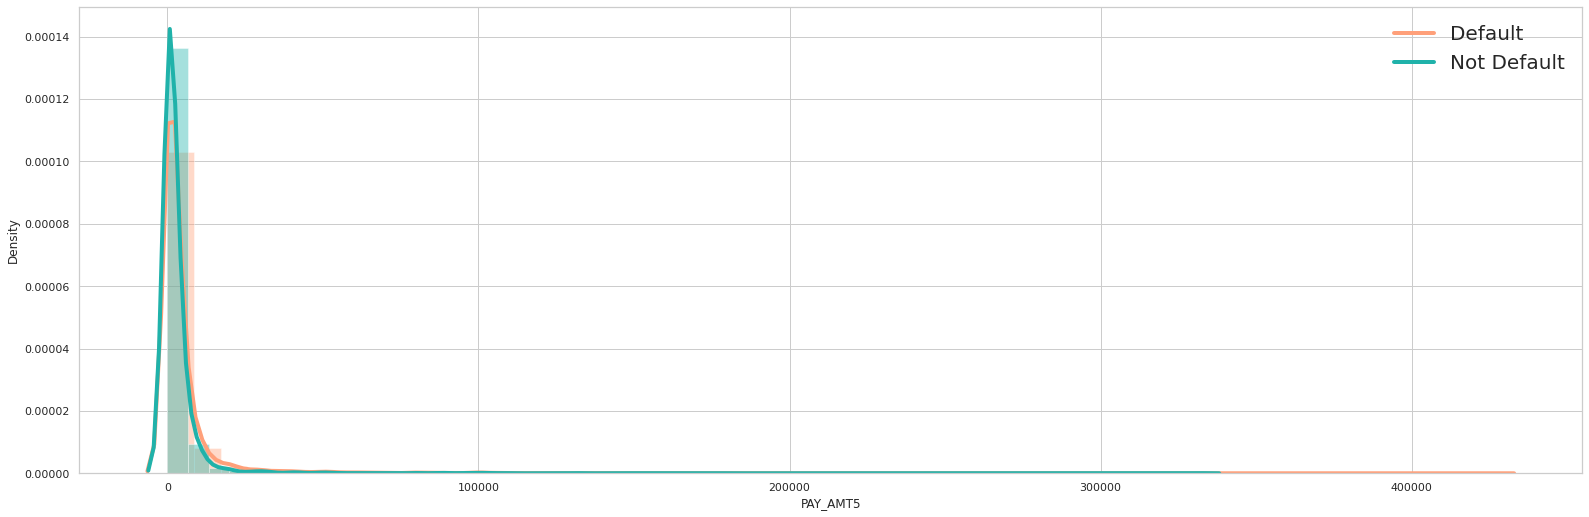

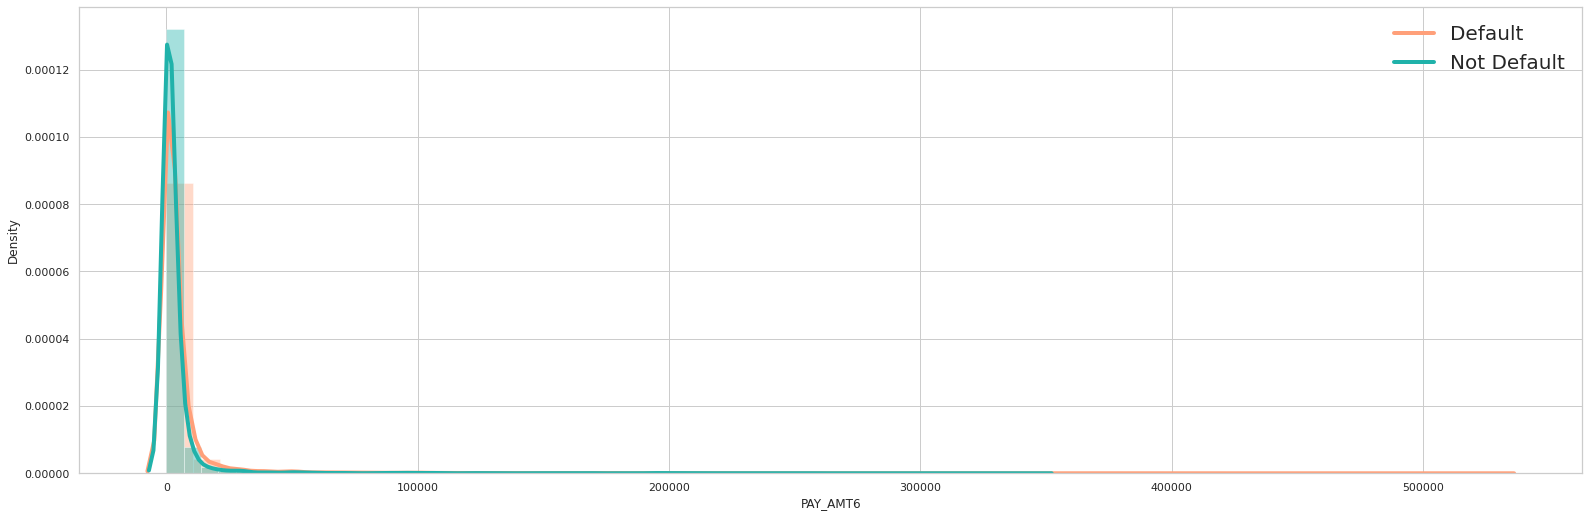

In [ ]:
# Distplot visualizations
distplot_column = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]

for i in distplot_column:
  generate_distplot(ccd, "DEFAULT", i, "Default","Not Default" )

# EDA Summary

- In this dataset, 77.9% of people paid the credit card bill, and only 22.1% of them paid defaults.
- Male occupies a slightly higher percentage to pay for the next month’s payment than female (Male - 24.17%; Female - 20.78%).
- University(23.4%) and High School(25.2%) have a higher percentage to pay for the next month's payment than Graduate(19.2%) and Other(7.1%) in Education column.
- Most of the clients are either married or single. Marriage status = 2(Single) has the lowest percentage(20.93%) to pay for the payment.
- The correlations between default and other features are not very high; only pay_0 to pay_6 columns have the correlation coefficient from 0.24 to 0.4. The heatmap also shows that there exists multicollinearity among some of these features.
- The non-default proportion is higher as the limit balance increases. In other words, clients with a higher limit balance are likely to pay on time.




# Model building Overview

In this section, we first run different kinds of classification models. Then we compare the performance of all the models. Finally, we selected a logistic regression model and two random forest models as our target models and tried to improve the model performance for predictions.

In [ ]:
def run_model(model, alg_name):
   # build the model on training data
   model.fit(X_train, y_train)
 
   # make predictions for test data
   y_pred = model.predict(X_test)
   # calculate the accuracy score
   accuracy =  accuracy_score(y_test, y_pred)
   cm = confusion_matrix(y_test, y_pred)
   scoresDT3 = cross_val_score(model, X_test, y_test, cv=6)
   Cr = classification_report(y_test, y_pred)
   
   print("Model: ", alg_name)
   print("Accuracy on Test Set for {} = {:.2f}\n".format(alg_name,accuracy))
   print(Cr)
   print("{}: CrossVal Accuracy Mean: {:.2f} and Standard Deviation: {:.2f} \n".format(alg_name,scoresDT3.mean(), scoresDT3.std()))

In [ ]:
# Prepare data
X = ccd.iloc[:,0:-1]
y = ccd.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

## Run different models - Decision Tree, Random Forest, Logistic Regression and K Nearest Neighbors Classifier

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
run_model(model, "Decision Tree")

Model:  Decision Tree
Accuracy on Test Set for Decision Tree = 0.72

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      9357
           1       0.38      0.41      0.39      2643

    accuracy                           0.72     12000
   macro avg       0.60      0.61      0.61     12000
weighted avg       0.73      0.72      0.72     12000

Decision Tree: CrossVal Accuracy Mean: 0.73 and Standard Deviation: 0.01 



In [ ]:
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest")

Model:  Random Forest
Accuracy on Test Set for Random Forest = 0.81

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      9357
           1       0.61      0.33      0.43      2643

    accuracy                           0.81     12000
   macro avg       0.72      0.63      0.65     12000
weighted avg       0.78      0.81      0.78     12000

Random Forest: CrossVal Accuracy Mean: 0.80 and Standard Deviation: 0.01 



In [ ]:
model = LogisticRegression()
run_model(model, "Logistic Regression")

Model:  Logistic Regression
Accuracy on Test Set for Logistic Regression = 0.78

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      9357
           1       1.00      0.00      0.00      2643

    accuracy                           0.78     12000
   macro avg       0.89      0.50      0.44     12000
weighted avg       0.83      0.78      0.68     12000

Logistic Regression: CrossVal Accuracy Mean: 0.78 and Standard Deviation: 0.00 



In [ ]:
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier")

Model:  Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 0.75

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      9357
           1       0.37      0.18      0.24      2643

    accuracy                           0.75     12000
   macro avg       0.58      0.55      0.55     12000
weighted avg       0.70      0.75      0.72     12000

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 0.75 and Standard Deviation: 0.01 



## Logistic Regression

In [ ]:
# Rename target feature
ccd.rename(columns={"default.payment.next.month": "DEFAULT"}, inplace=True)

In [ ]:
# Split target and dependent variables
y = ccd.DEFAULT     # target default=1 or non-default=0
vars = ccd.drop('DEFAULT', axis = 1, inplace = False)

In [ ]:
# Normalize data
stdX = (vars - vars.mean()) / (vars.std())  

In [ ]:
X = ccd.drop('DEFAULT', axis=1)  
y = ccd['DEFAULT']

Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, random_state = 42)

In [ ]:
ccd.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Initialize Logistic Regressor 
logreg = LogisticRegression()

In [ ]:
rfe = RFE(logreg, 5)
fit = rfe.fit(stdX, y)
print("Standardized Model Feature Ranking:", fit.ranking_)

Standardized Model Feature Ranking: [ 3  9 12  8 13  1 16  4 10  6  2  1  1  5 19  7 18  1  1 17 15 14 11]


###  Top 5 important features from feature selection RFE: PAY_0, BILL_AMT1, BILL_AMT2, PAY_AMT1, PAY_AMT2

In [ ]:
score_std = rfe.score(stdX,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_std.mean(), score_std.std()))

Standardized Model Score with selected features is: 0.819633 (0.000000)


In [ ]:
X_important = stdX[['PAY_0', 'BILL_AMT1','BILL_AMT2','PAY_AMT1','PAY_AMT2']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_important,y, test_size=0.2 , random_state=42)

In [ ]:
param_grid = {'C': np.logspace(-2, 3, 4)}

In [ ]:
# Instantiate the RandomizedSearchCV object:
logreg_cv_std = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=42)

# Fit it to the standardized data
logreg_cv_std.fit(Xstd_train, ystd_train)

# Print the tuned parameters 
print("Tuned Logistic Regression Parameters with standardized features: {}".format(logreg_cv_std.best_params_)) 

Tuned Logistic Regression Parameters with standardized features: {'C': 0.464158883361278}


In [ ]:
# Fit model and evaluate the model performance
logreg_imp = LogisticRegression(C=0.46, random_state=42)
logreg_imp.fit(X_train1, y_train1)
y_pred_train = logreg_imp.predict(X_train1)
y_pred_test = logreg_imp.predict(X_test1)
print('Testing Accuracy:', metrics.accuracy_score(y_pred_test,y_test1))
print('Testing classification report:', classification_report(y_test1, y_pred_test))

Testing Accuracy: 0.8198333333333333
Testing classification report:               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.32      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



# Random Forest Model

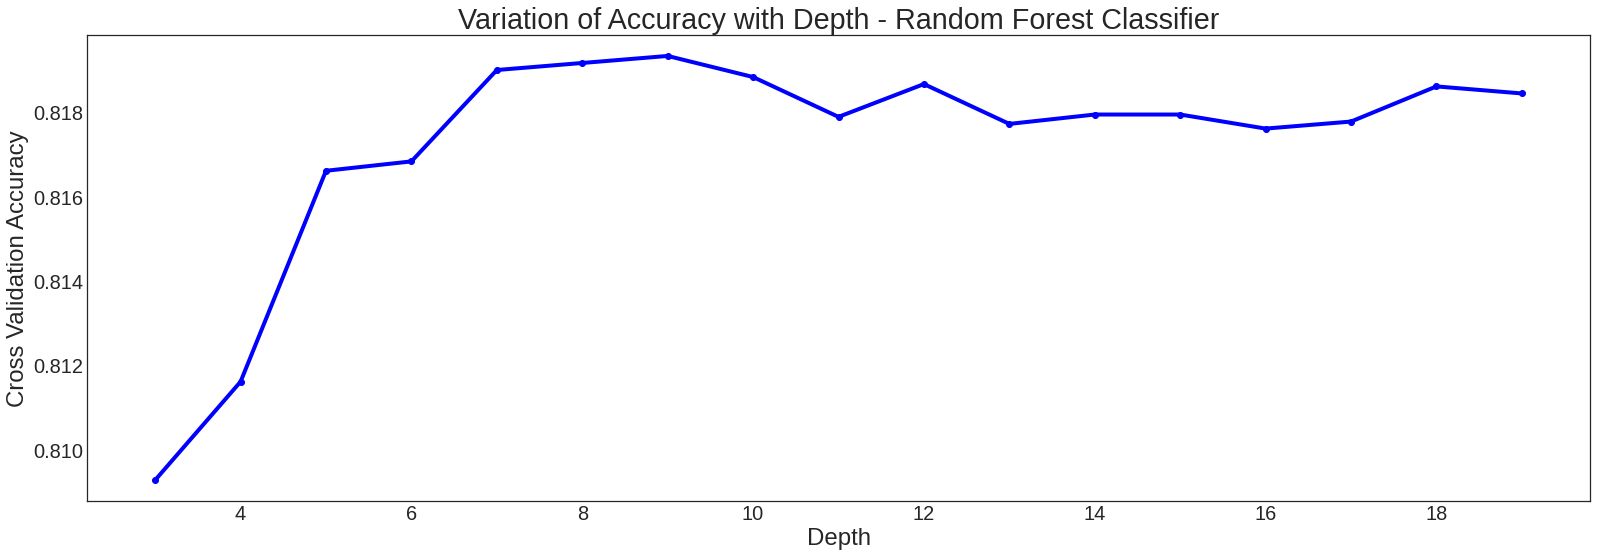

In [ ]:
# Find out the most suitable parameter - maximum depth 
depth, tree_start, tree_end = {}, 3, 16
for i in range(tree_start, tree_end):
    model = RandomForestClassifier(max_depth=i)
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, n_jobs=-1)
    depth[i] = scores.mean()
    
# Plot
lists = sorted(depth.items())
x, y = zip(*lists) 
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Depth")
plt.title('Variation of Accuracy with Depth - Random Forest Classifier')
plt.plot(x, y, 'b-', marker='o')
plt.show()

In [ ]:
# Set the parameter we want to test
param_grid = { 
    'n_estimators': [10, 20, 30, 40, 50],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10],
    'criterion' :['entropy']
}

In [ ]:
# Using GridSearch to find the best model for prediction
# Notes: It takes a long time to run
rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 30}

In [ ]:
# Random Forest model 1
RF1 = RandomForestClassifier(n_estimators=30, max_depth=8)
run_model(RF1, "Random Forest")

Model:  Random Forest
Accuracy on Test Set for Random Forest = 0.82

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9357
           1       0.66      0.36      0.46      2643

    accuracy                           0.82     12000
   macro avg       0.75      0.65      0.68     12000
weighted avg       0.80      0.82      0.80     12000

Random Forest: CrossVal Accuracy Mean: 0.82 and Standard Deviation: 0.01 



In [ ]:
# Random Forest model 2 
RF2 = RandomForestClassifier(n_estimators=40, max_depth=5)
run_model(RF2, "Random Forest")

Model:  Random Forest
Accuracy on Test Set for Random Forest = 0.81

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      9357
           1       0.68      0.28      0.39      2643

    accuracy                           0.81     12000
   macro avg       0.75      0.62      0.64     12000
weighted avg       0.79      0.81      0.78     12000

Random Forest: CrossVal Accuracy Mean: 0.81 and Standard Deviation: 0.01 



In [ ]:
# Compare the performance of all models
data_rows = [ ('Decision Tree', 'original', 0.73, 0.72, 0.72),
             ('Random Forest', 'original,n=10', 0.78, 0.80, 0.78),
             ('Logistic Regression', 'Original', 0.83, 0.78, 0.68),
              ('Logistic Regression', 'standardize+important features', 0.80, 0.82, 0.79),
             ('KNeighbors', 'Original', 0.70,0.75,0.72),
             ('Random Forest 1', 'original,n=40,max=7', 0.80, 0.82, 0.79),
              ('Random Forest 2', 'original,n=40,max=5', 0.79, 0.81, 0.78)
            ]
table = Table(rows=data_rows, names=('Model', 'Data', 'Precision', 'Recall', 'F1-score'))
print(table)

       Model                     Data              Precision Recall F1-score
------------------- ------------------------------ --------- ------ --------
      Decision Tree                       original      0.73   0.72     0.72
      Random Forest                  original,n=10      0.78    0.8     0.78
Logistic Regression                       Original      0.83   0.78     0.68
Logistic Regression standardize+important features       0.8   0.82     0.79
         KNeighbors                       Original       0.7   0.75     0.72
    Random Forest 1            original,n=40,max=7       0.8   0.82     0.79
    Random Forest 2            original,n=40,max=5      0.79   0.81     0.78


**Model performance summary**

- The precision of all the models are well (0.7~0.83).
- Both Logistic Regression with important features model (logreg_imp) and Random Random Forest 1 (RF1) have the highest recall (0.82) and f1-score (0.79), followed by Random Forest 2 model (recall - 0.81; f1-score - 0.78).
- We select Logistic Regression with important features model (logreg_imp), Random Forest 1 (RF1), and Random Forest 2 (RF2) for further predictions.



# Random dataset for prediction

This section first uses a random function to generate the five records of random samples for prediction. However, since the random samples did not meet some reasonable conditions, we manually encoded five sample data records for prediction. We will describe both results in the following section. 

### Sample data using random function

In [ ]:
ccd

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
ccd.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
ccd.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [ ]:
[random.randint(0,8) for i in range(5)]

[7, 0, 2, 7, 5]

In [ ]:
# Generate random sample
random_input = pd.DataFrame(columns = ccd.columns)
random.seed(42)
for i in range(5):
  x = []
  x.append(random.randint(40000,1000000))
  x.append(random.randint(1,2))
  x.append(random.randint(1,4))
  x.append(random.randint(0, 3))
  x.append(random.randint(21, 79))
  x = x + [random.randint(0,8) for i in range(6)]
  x = x + [random.randint(0, 40000) for i in range(6)]
  x = x + [random.randint(0, 40000) for i in range(6)]
  x.append(random.randint(0, 1))
  random_input.loc[i] = x

In [ ]:
random_input

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,710487,1,1,2,36,3,2,1,8,1,6,2082,1952,6140,14328,15247,33118,39453,1739,36781,13031,35713,27493,0
1,511029,2,1,1,65,6,5,4,2,3,5,6698,6078,24898,6338,23526,22541,39565,17335,2847,30108,35142,8180,1
2,122627,2,3,1,66,1,0,3,4,1,3,6619,24911,18217,29714,23909,10659,24260,23283,13730,17496,4679,39920,0
3,600086,1,2,3,45,4,8,3,5,0,3,2103,20673,26290,17546,4337,13826,37170,20622,13934,32717,25928,30071,0
4,317746,1,2,2,68,6,6,5,3,2,8,32343,5957,3087,7185,10016,10484,27666,39086,4163,25216,25009,39052,1


In [ ]:
log_column = ['PAY_0', 'BILL_AMT1','BILL_AMT2','PAY_AMT1','PAY_AMT2']
sample_log = random_input[random_input.columns.intersection(log_column)]
sample_log_predict = logreg_imp.predict(sample_log)

In [ ]:
sample_rf = random_input.drop(columns=["DEFAULT"])
sample_rf1_predict = RF1.predict(sample_rf)
sample_rf2_predict = RF2.predict(sample_rf)

In [ ]:
random_input.drop(columns="DEFAULT", inplace=True)
random_input = random_input.join(pd.DataFrame(sample_log_predict, columns= {"logistic prediction"}))
random_input = random_input.join(pd.DataFrame(sample_rf1_predict, columns= {"Random Forest1 prediction"}))
random_input = random_input.join(pd.DataFrame(sample_rf2_predict, columns= {"Random Forest2 prediction"}))

In [ ]:
random_input 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,logistic prediction,Random Forest1 prediction,Random Forest2 prediction
0,710487,1,1,2,36,3,2,1,8,1,6,2082,1952,6140,14328,15247,33118,39453,1739,36781,13031,35713,27493,0,0,0
1,511029,2,1,1,65,6,5,4,2,3,5,6698,6078,24898,6338,23526,22541,39565,17335,2847,30108,35142,8180,0,1,0
2,122627,2,3,1,66,1,0,3,4,1,3,6619,24911,18217,29714,23909,10659,24260,23283,13730,17496,4679,39920,0,0,0
3,600086,1,2,3,45,4,8,3,5,0,3,2103,20673,26290,17546,4337,13826,37170,20622,13934,32717,25928,30071,0,0,0
4,317746,1,2,2,68,6,6,5,3,2,8,32343,5957,3087,7185,10016,10484,27666,39086,4163,25216,25009,39052,0,1,0


**Output Summary**   
Most of the values in the “Pay_AMT” columns in our random samples are too high, which do not seem reasonable since 75 percentile data has lower value based on the descriptive statistics summary. As a result, we would like to try manually encoding five records of samples.

### Manually encode reasonable sample data

In [ ]:
# Create five random records of X input
random1 = ['200000','1','2','2','40','0','0','1','0','2','0','63424','613','1235432','0','123435','43212','32412','1000','100342','20000','83462','43212']
random2 = ['30000','0','3','1','23','0','1','1','0','0','1','3424','0','25432','699','3435','18322','1613','0','19034','200','2362','512']
random3 = ['100000','0','3','3','32','2','1','0','0','2','0','0','35341','85432','23639','74435','13642','0','6342','53324','23639','66342','8312']
random4 = ['150000','1','1','3','56','1','0','0','3','1','0','83241','54441','1325','2639','124435','93642','83241','434535','0','0','13532','84232']
random5 = ['70000','0','1','1','43','1','0','4','1','1','0','54325','35341','853','363','64435 ','642','54325','23642','853','1000','64435','312']
 
# Combine into new dataframe
col = ccd.columns[:-1]
df5 = pd.DataFrame(np.array([random1,random2,random3,random4,random5]),columns= col)
 
# Select important features for Logistic Regression
df5_log = df5[['PAY_0', 'BILL_AMT1','BILL_AMT2','PAY_AMT1','PAY_AMT2']]

In [ ]:
# Create two lists of model and dataframe for prediction of the output
pred5_models = [RF1,RF2,logreg_imp]
pred5_df = [df5,df5,df5_log]
 
# Create output dataframe for DEFAULT
output5 = pd.DataFrame()
 
for mod, df in zip(pred5_models,pred5_df):
 y_pred = mod.predict(df)
 output5 = output5.append([y_pred])
 
output5 = output5.swapaxes('index','columns',copy=True)
output5.columns = ['RF1.DEFAULT','RF2.DEFAULT','logreg.DEFAULT']
output5

,RF1.DEFAULT,RF2.DEFAULT,logreg.DEFAULT
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [ ]:
# Join random input and output dataframe 
df5.join(output5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RF1.DEFAULT,RF2.DEFAULT,logreg.DEFAULT
0,200000,1,2,2,40,0,0,1,0,2,0,63424,613,1235432,0,123435,43212,32412,1000,100342,20000,83462,43212,0,0,0
1,30000,0,3,1,23,0,1,1,0,0,1,3424,0,25432,699,3435,18322,1613,0,19034,200,2362,512,0,0,0
2,100000,0,3,3,32,2,1,0,0,2,0,0,35341,85432,23639,74435,13642,0,6342,53324,23639,66342,8312,0,0,1
3,150000,1,1,3,56,1,0,0,3,1,0,83241,54441,1325,2639,124435,93642,83241,434535,0,0,13532,84232,0,0,0
4,70000,0,1,1,43,1,0,4,1,1,0,54325,35341,853,363,64435,642,54325,23642,853,1000,64435,312,0,0,0


**Output Summary**    
As the result of the output for the encoded sample, we got all '0' for Random Forest models (RF1 and RF2), and we got one ‘1’(Default - Yes) in Logistic Regression(logreg_imp). We think the result is reasonable based on there are around 20% of people who pay the default payment in the original dataset.

# Implications and Applications
- We could use these models to predict the default with about 80% of accuracy.
- Help the issuers to have a better understanding of their potential and current customers.  
- Make proper decisions on offering credit products to which category of customers.


## Reference

* Piccolo. (2011, August 16). [How to set the labels size on a pie chart in python.](https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python)

* Bibor Szabo. (2020, May 25). [How to Create a Seaborn Correlation Heatmap in Python?](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

* Will Koehrsen. (2018, January 9). [Hyperparameter Tuning the Random Forest in Python.](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

* Ben Keen. (2017, May 31). [DECISION TREE CLASSIFIER IN PYTHON USING SCIKIT-LEARN.](https://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/)

* GeeksforGeeks. (2020, July 15). [Python – seaborn.FacetGrid() method.](https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/)

* Different Classification Techniques - Python. (2021).[Different Classification Techniques](https://www.kaggle.com/coolman/different-classification-techniques-python)


- Kaggle. (2021). [Random Forest using GridSearchCV](https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv)

- Havard University Lab Material. (2018). [Harvard University - Standard Section 8: Bagging and Random Forest](https://harvard-iacs.github.io/2018-CS109A/sections/section-8/student/)